# Klasyfikacja bazy danych Covid-19

Baza danych Covid-19 przedstawiająca dane zachorowań populacji. Zawiera 21 kolumn i 1048576 rekordów. 

Poszczególne dane oznaczone są cyframi '1' - oznaczającymi 'true' i '2' - oznaczającymi 'false'.

Dane zostały udostępnione przez rząd Meksykański.

### Poszczególne kolumny:
- **usmer**: usmer - wskazuje, czy pacjent był leczony jednostkami medycznymi pierwszego, drugiego lub trzeciego poziomu.
- **medical unit**: jednostka medyczna - rodzaj instytucji Narodowego Systemu Zdrowia, która udzieliła pomocy.
- **sex**: płeć - 1 dla kobiety i 2 dla mężczyzny.
- **patient type**: typ pacjenta - rodzaj opieki, jaką pacjent otrzymał w jednostce. 1 dla pacjentów wróconych do domu i 2 dla hospitalizacji.
- **date died**: data zgonu - jeśli pacjent zmarł, należy podać datę zgonu, a w przeciwnym razie 9999-99-99.
- **intubed**: intubacja - czy pacjent był podłączony do respiratora.
- **pneumonia**: zapalenie płuc - czy pacjent już ma zapalenie pęcherzyków płucnych, czy nie.
- **age**: wiek - pacjenta.
- **pregnancy**: ciąża - czy pacjent jest w ciąży czy nie.
- **diabetes**: cukrzyca - czy pacjent ma cukrzycę czy nie.
- **copd**: POChP - wskazuje, czy pacjent ma przewlekłą obturacyjną chorobę płuc czy nie.
- **asthma**: astma - czy pacjent ma astmę czy nie.
- **inmsupr**: inmsupr - czy pacjent jest immunosupresyjny czy nie.
- **hipertension**: nadciśnienie - czy pacjent ma nadciśnienie czy nie.
- **other disease**: inne choroby - czy pacjent ma inne choroby czy nie.
- **cardiovascular**: sercowo-naczyniowe - czy pacjent ma chorobę serca lub naczyń krwionośnych.
- **obesity**: otyłość - czy pacjent jest otyły czy nie.
- **renal chronic**: przewlekła choroba nerek - czy pacjent ma przewlekłą chorobę nerek czy nie.
- **tobacco**: tytoń - czy pacjent jest użytkownikiem tytoniu.
- **classification**: klasyfikacja - wyniki testu Covid. Wartości od 1 do 3 oznaczają, że pacjent został zdiagnozowany z Covid w różnym stopniu zaawansowania. Wartość 4 lub wyższa oznacza, że pacjent nie jest nosicielem Covid lub że test jest niejednoznaczny.
- **icu**: oddział intensywnej terapii - wskazuje, czy pacjent był przyjęty na Oddział Intensywnej Terapii.

array([[%lt;AxesSubplot:title={'center':'USMER'}%gt;,
 %lt;AxesSubplot:title={'center':'MEDICAL_UNIT'}%gt;,
 %lt;AxesSubplot:title={'center':'SEX'}%gt;,
 %lt;AxesSubplot:title={'center':'PATIENT_TYPE'}%gt;],
 [%lt;AxesSubplot:title={'center':'INTUBED'}%gt;,
 %lt;AxesSubplot:title={'center':'PNEUMONIA'}%gt;,
 %lt;AxesSubplot:title={'center':'AGE'}%gt;,
 %lt;AxesSubplot:title={'center':'PREGNANT'}%gt;],
 [%lt;AxesSubplot:title={'center':'DIABETES'}%gt;,
 %lt;AxesSubplot:title={'center':'COPD'}%gt;,
 %lt;AxesSubplot:title={'center':'ASTHMA'}%gt;,
 %lt;AxesSubplot:title={'center':'INMSUPR'}%gt;],
 [%lt;AxesSubplot:title={'center':'HIPERTENSION'}%gt;,
 %lt;AxesSubplot:title={'center':'OTHER_DISEASE'}%gt;,
 %lt;AxesSubplot:title={'center':'CARDIOVASCULAR'}%gt;,
 %lt;AxesSubplot:title={'center':'OBESITY'}%gt;],
 [%lt;AxesSubplot:title={'center':'RENAL_CHRONIC'}%gt;,
 %lt;AxesSubplot:title={'center':'TOBACCO'}%gt;,
 %lt;AxesSubplot:title={'center':'CLASIFFICATION_FINAL'}%gt;,
 %lt;AxesSubplot:title={'center':'ICU'}%gt;]], dtype=object)

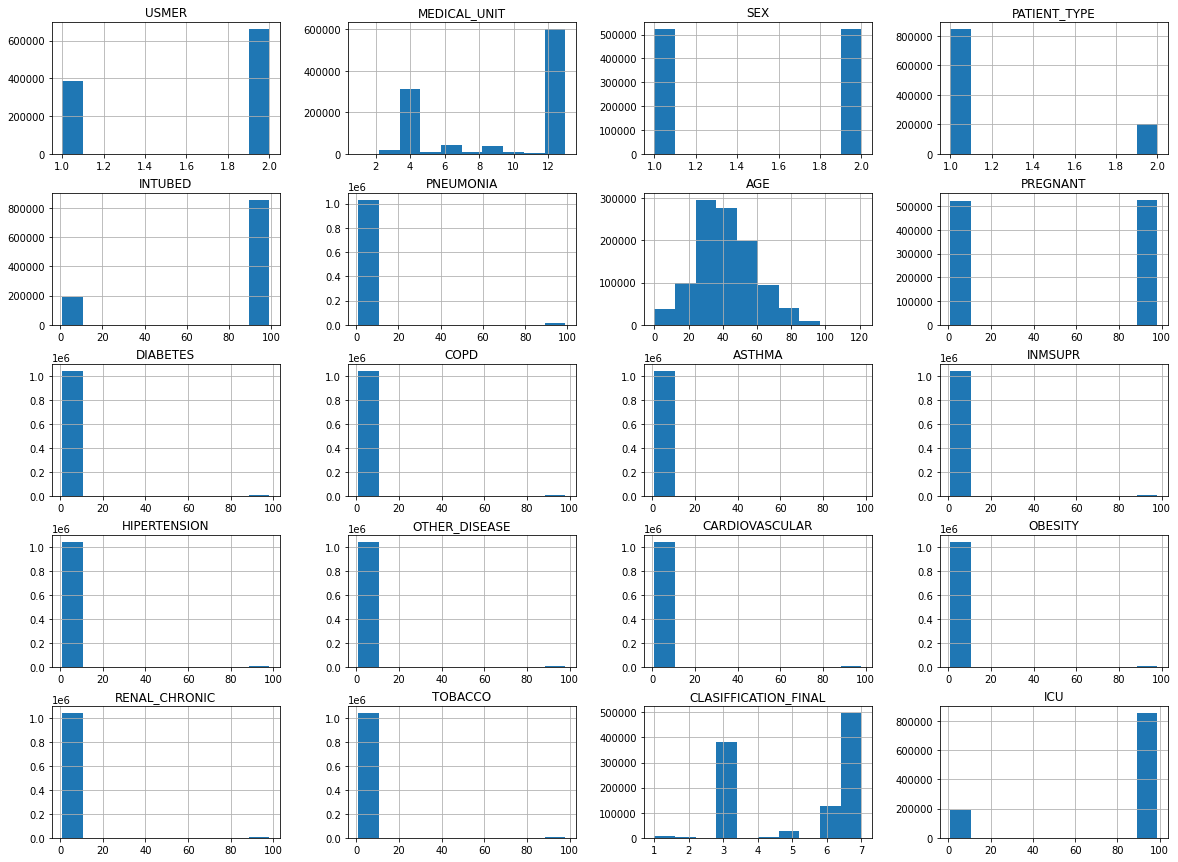

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/data/notebook_files/Covid Data.csv')
df.head()
df.hist(figsize=(20, 15))

# Preprocessing bazy danych

Na samym starcie sprawdzamy czy baza nie zawiera braków danych, w takich przypadkach należy je naprawić lub usunąć. Zaczynamy od sprawdzenia liczby brakujących wartości dla każdej kolumny:

In [5]:
df.isnull().sum()

USMER 0
MEDICAL_UNIT 0
SEX 0
PATIENT_TYPE 0
DATE_DIED 0
INTUBED 0
PNEUMONIA 0
AGE 0
PREGNANT 0
DIABETES 0
COPD 0
ASTHMA 0
INMSUPR 0
HIPERTENSION 0
OTHER_DISEASE 0
CARDIOVASCULAR 0
OBESITY 0
RENAL_CHRONIC 0
TOBACCO 0
CLASIFFICATION_FINAL 0
ICU 0
dtype: int64

Sprawdzenie typów danych:

In [6]:
df.dtypes

USMER int64
MEDICAL_UNIT int64
SEX int64
PATIENT_TYPE int64
DATE_DIED object
INTUBED int64
PNEUMONIA int64
AGE int64
PREGNANT int64
DIABETES int64
COPD int64
ASTHMA int64
INMSUPR int64
HIPERTENSION int64
OTHER_DISEASE int64
CARDIOVASCULAR int64
OBESITY int64
RENAL_CHRONIC int64
TOBACCO int64
CLASIFFICATION_FINAL int64
ICU int64
dtype: object

Następnie generujemy statystyki z danych w celu znalezienia odstępstw od normy:

In [7]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


Kolumną która będzie główną do sprawdzenia jest wynik testu (**classification**). Wartości od 1 do 3 oznaczają, że pacjent został zdiagnozowany z Covid w różnym stopniu zaawansowania. Wartość 4 lub wyższa oznacza, że pacjent nie jest nosicielem Covid lub że test jest niejednoznaczny.

Test pozytywny: 37.38%
Test negatywny: 62.62%


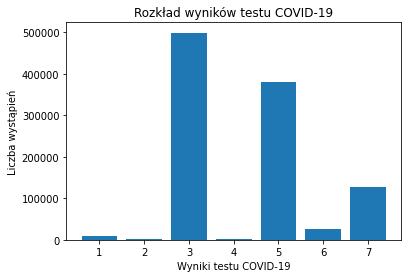

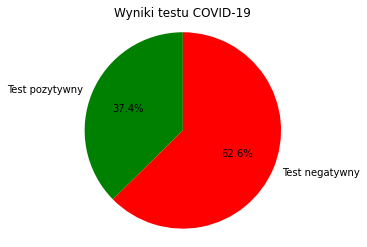

In [19]:
wyniki_testu = df['CLASIFFICATION_FINAL'].unique()
plt.bar(wyniki_testu, df.CLASIFFICATION_FINAL.value_counts())

plt.xlabel("Wyniki testu COVID-19")
plt.ylabel("Liczba wystąpień")
plt.title("Rozkład wyników testu COVID-19")

plt.show()

num_positive = len(df[df.CLASIFFICATION_FINAL <= 3])
num_negative = len(df[df.CLASIFFICATION_FINAL > 3])

percent_positive = num_positive / len(df) * 100
percent_negative = num_negative / len(df) * 100

print(f"Test pozytywny: {percent_positive:.2f}%")
print(f"Test negatywny: {percent_negative:.2f}%")

labels = ['Test pozytywny', 'Test negatywny']
sizes = [percent_positive, percent_negative]
colors = ['green', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Wyniki testu COVID-19')

plt.show()

# Bibliografia

Baza danych na kaggle: [https://www.kaggle.com/datasets/meirnizri/covid19-dataset](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

Oryginalne źródło danych: [https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico](https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico)